# Midterm-1 Review Questions 
### ECE 204 Data Science & Engineering

In [1]:
import pandas as pd
df = pd.read_csv("cars.csv")
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


---
**Question 1** Find the name of the car with the highest horsepower.

In [2]:
idx = df.Horsepower.idxmax()
car_name = df.Name.loc[idx]
car_name

'pontiac grand prix'

---
**Question 2** How many cars in the dataset have a weight larger than or equal to 3000.0 lbs?

In [3]:
df = pd.read_csv("cars.csv")
df.head(2)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


In [4]:
len(df[df['Weight_in_lbs'] >= 3000].index)

174

---
**Question 3** Find the displacement of the car(s) that has the shortest `Name` (in terms of number of characters) in the dataset.
<br>
*If there are more than one car that share the same "shortest" name, find the displacement of all such cars.*

In [5]:
df = pd.read_csv("cars.csv")
df.head(2)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


In [15]:
df['name_len'] = df.Name.apply(len)
df.name_len.min()
min_dis_df = df[df.name_len == df.name_len.min()]
min_dis_df.Displacement

157    108.0
353     97.0
Name: Displacement, dtype: float64

---
**Question 4** Find the name of the car(s) that contain the most occurences of the letter `a` in the dataset.
<br>
*If there are more than one such car, display them all.*

In [ ]:
df = pd.read_csv("cars.csv")
df.head(2)

In [18]:
def count(word):
    return word.count('a')
df['a_count'] = df.Name.apply(count)
# idx_max = df.a_count.idxmax()
# car_name = df.Name.loc[idx_max]
# car_name
max_name = df[df.a_count == df.a_count.max()]
max_name.Name

46     pontiac catalina brougham
103      amc ambassador brougham
Name: Name, dtype: object

---
**Question 5** For all cars having `Horsepower` greater than or equal to 100.0,find the following:
- Average `Acceleration`
- Median `Displacement`
- Standard Deviation of `Weight_in_lbs`
- Plot the histogram of `Acceleration` for all such cars

In [19]:
df = pd.read_csv("cars.csv")
df.head(2)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


([13.789655172413793, 304.0, 640.6511103502518], <Axes: ylabel='Frequency'>)

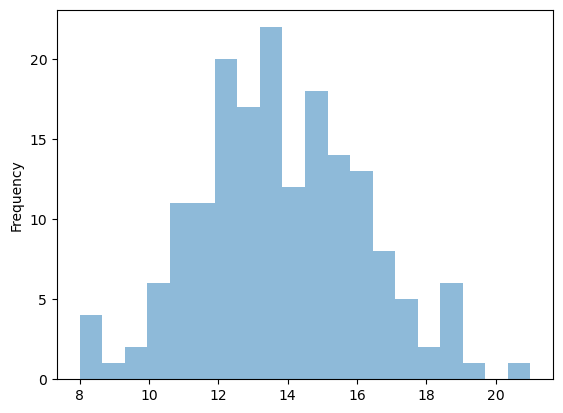

In [25]:
list = []
hp_greater_than_100 = df[df['Horsepower'] >= 100]
list.append(hp_greater_than_100.Acceleration.mean())
list.append(hp_greater_than_100.Displacement.median())
list.append(hp_greater_than_100.Weight_in_lbs.std())
ax = hp_greater_than_100.Acceleration.plot.hist(bins=20, alpha=0.5)
list, ax

---
**Question 6** In the cars dataset, find the general relationship between `Displacement` and `Horsepower` of the cars. <br>
Which plot type (line/bar/scatter/histogram) is the most suitable to visualize this relationship, and why?

In [26]:
df = pd.read_csv("cars.csv")
df.head(2)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


<Axes: xlabel='Displacement', ylabel='Horsepower'>

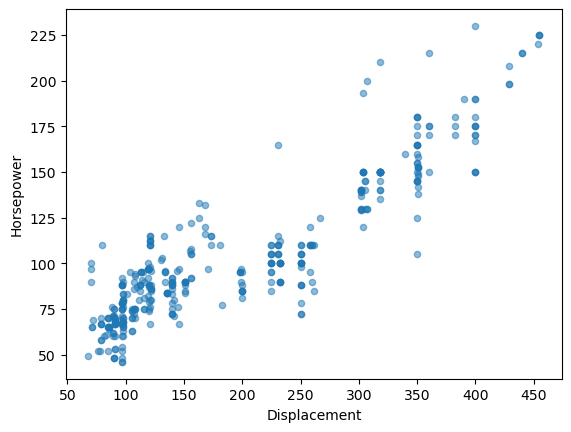

In [28]:
df.plot.scatter(x='Displacement', y='Horsepower', alpha=0.5)

---
**Question 7** Using the cars dataset, find the average `Miles per Gallon` for each possible `Origin`. You may want to use the `.unique()` method to find out how many unique origins there are.

Create a new DataFrame with the values you found above and generate a suitable (line/bar/scatter/histogram) visualization.

In [38]:
df = pd.read_csv("cars.csv")
df.head(2)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01


Text(0, 0.5, 'MPG')

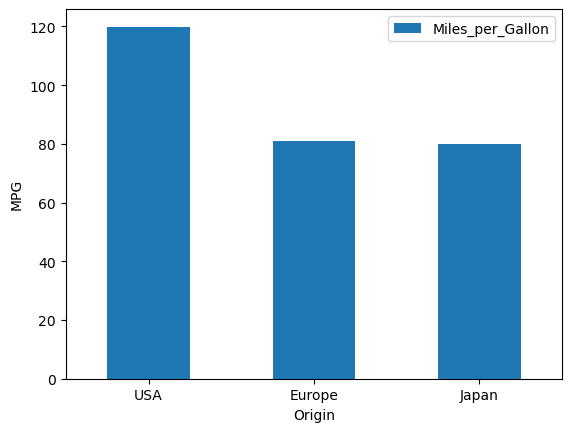

In [54]:
# df.Origin.unique()
MPG_USA = df[df['Origin'] == 'USA'].Horsepower.mean()
MPG_EU = df[df['Origin'] == 'Europe'].Horsepower.mean()
MPG_JP = df[df['Origin'] == 'Japan'].Horsepower.mean()
MPG = pd.DataFrame({'Miles_per_Gallon': [MPG_USA, MPG_EU, MPG_JP], 'Origin': ['USA', 'Europe', 'Japan']})
ax = MPG.plot.bar(x='Origin', y='Miles_per_Gallon', rot=0)
ax.set_ylabel('MPG')